In [54]:
import mysql.connector
import pandas as pd
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer    
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler 
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,f1_score ,recall_score ,precision_score,confusion_matrix ,roc_curve ,accuracy_score
import pickle

In [2]:
data = pd.read_csv('E:\solor\Sampled_data.csv')

In [20]:
data.head()

,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,Label
0,2.529724,85.156250,147.94922,-0.537965,0.691528,-0.193853,114.63776,-146.497650,37.240192,0.719625,50.024870,155.72755,50.000637,1
1,2.180633,91.094970,147.07031,-0.276124,-0.416260,0.638667,69.02374,87.780460,-154.529920,0.703053,49.966366,155.42188,49.997097,0
2,1.568542,101.226810,143.26172,-0.430543,-0.033569,0.423823,120.64087,20.492554,-143.094280,0.464771,49.973644,154.69420,50.001373,0
3,2.398224,86.413574,147.07031,-0.685670,0.577393,0.047847,138.74664,-131.610410,-1.016591,0.732350,49.892788,155.73491,50.001380,1
4,1.400146,101.367190,144.72656,-0.390260,-0.080566,0.464106,113.22739,38.453674,-147.887920,0.488795,49.965633,155.79897,50.002266,1


In [19]:
data=data.drop(data.columns[0],axis=1)

In [5]:
data['Label'].unique()

array(['F', 'NF'], dtype=object)

In [7]:
# Chicking unique values
data["Label"].value_counts()

F     10010
NF     9991
Name: Label, dtype: int64

In [10]:
# encoding output variable column for faulty :1 and nonfaulty with 0
data = data.replace({"NF" :0 ,"F" :1})

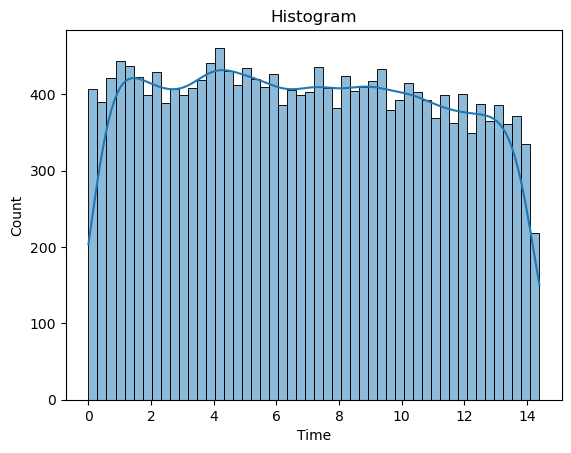

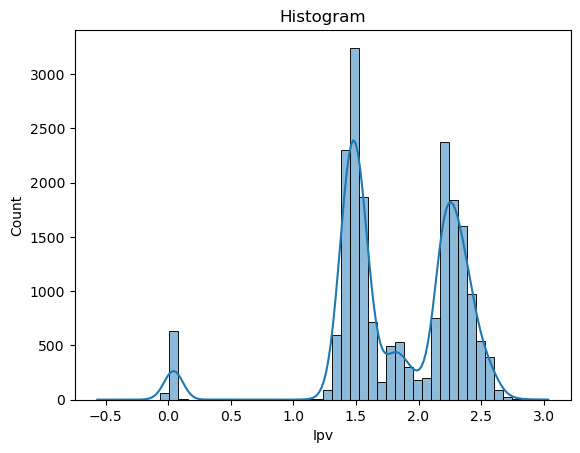

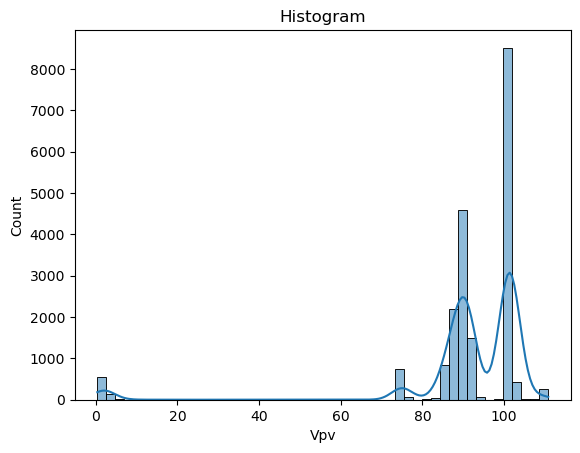

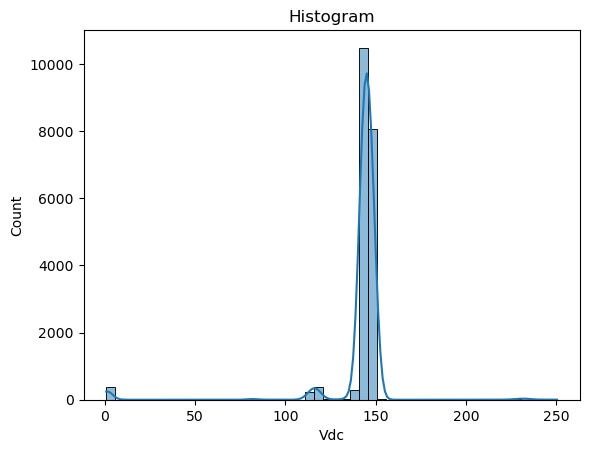

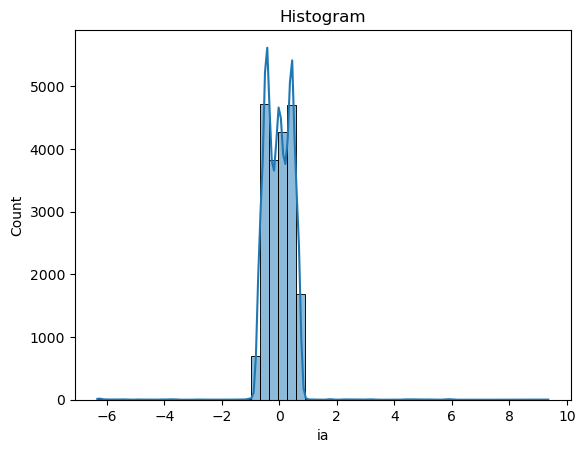

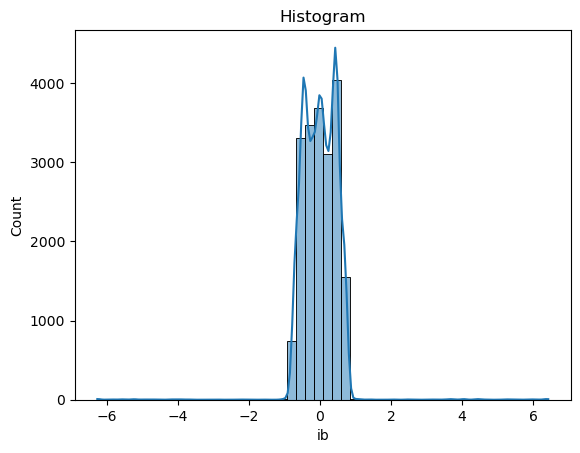

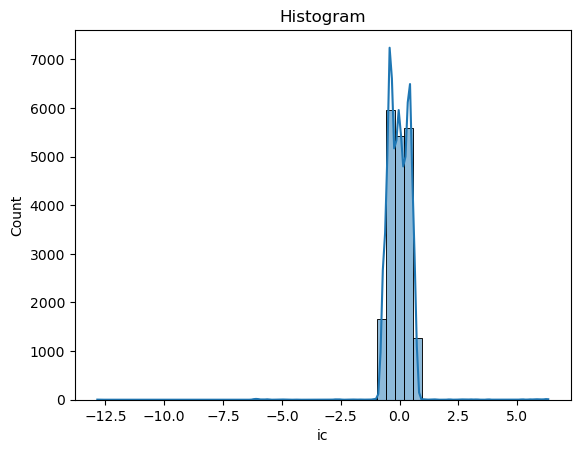

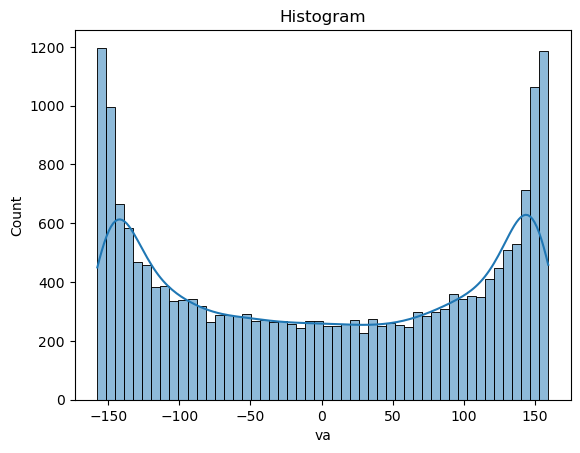

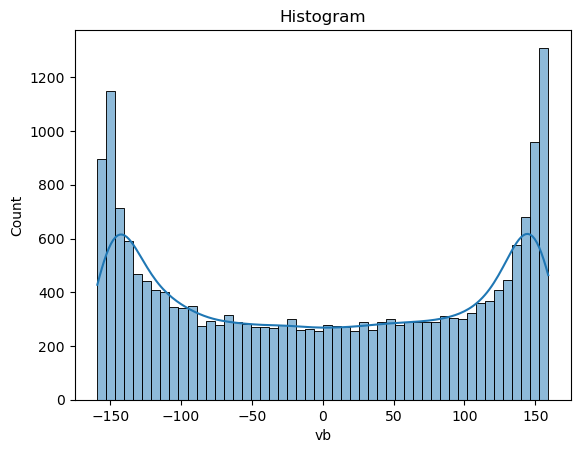

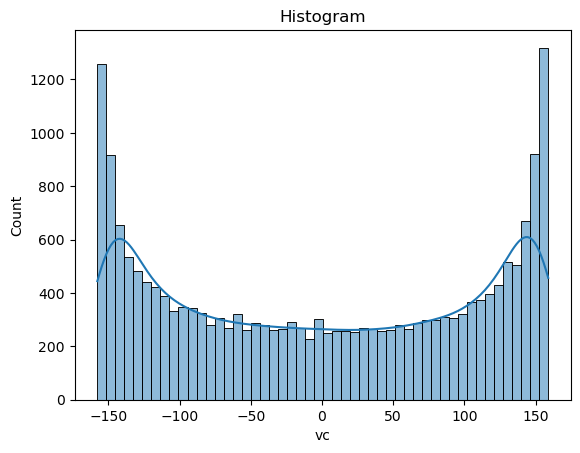

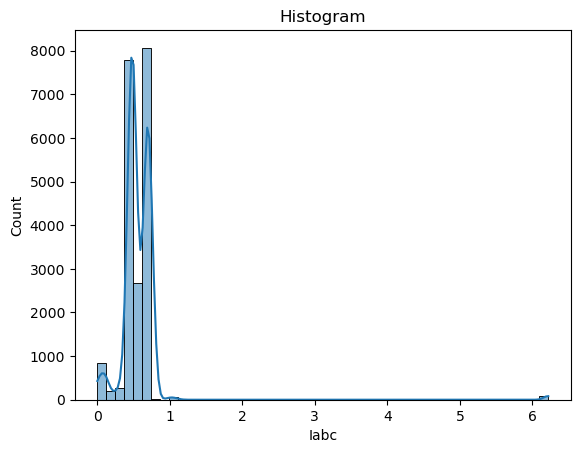

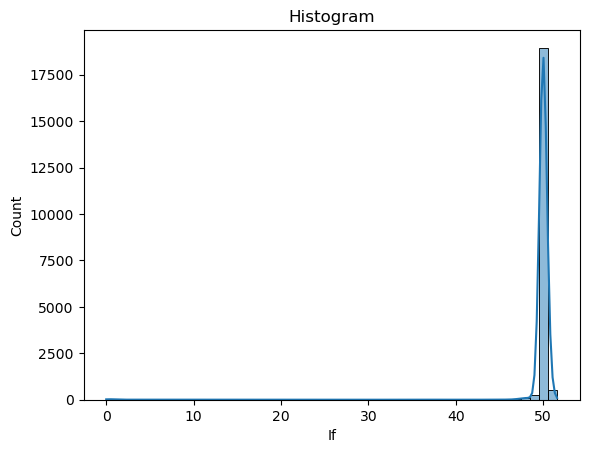

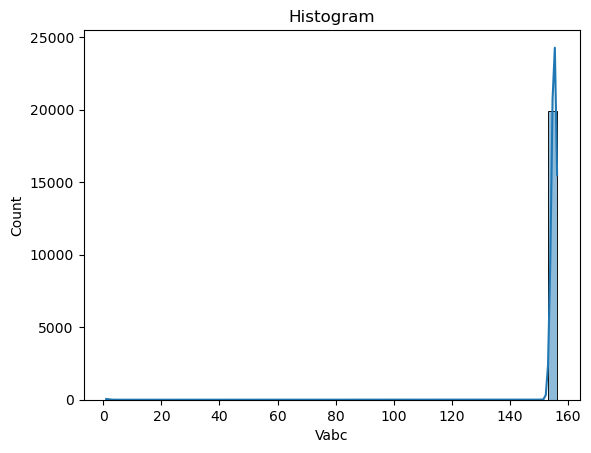

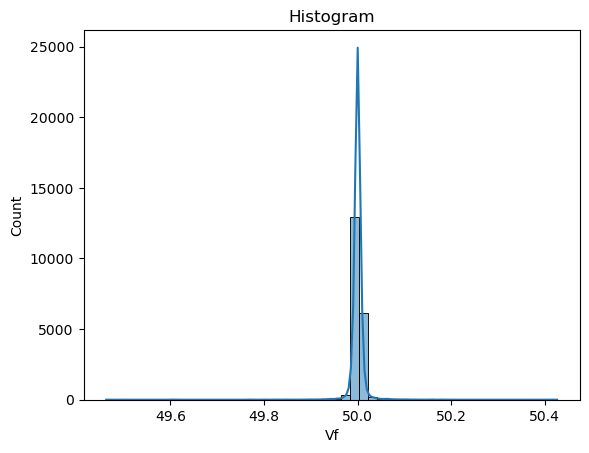

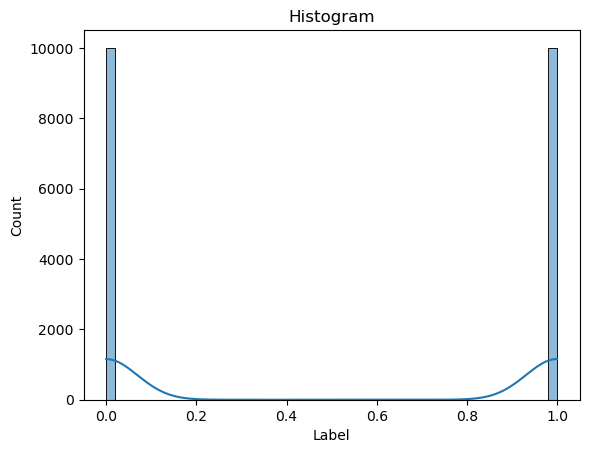

In [11]:
# Histogram for all columns

for i in data:
    sns.histplot(data[(i)], bins = 50, kde=True)
    plt.title("Histogram")
    plt.show()

1 Unimodel Columns:
    Vf : Positive-sequence estimated vurrent frequency
    Vdc : DC voltage measurement
    Vabc : Positive-sequence estimated voltage magnitude.
    If : Positive-sequence estimated current frequency
2 Bimodel Columns :
    Ipv : PV array current measurement.
    Vpv : PV array voltage measurement.
    Va : Phase_A voltage measurement.
    Vb : Phase_B voltage measurement.
    Vc : Phase_C voltage measurement
    Iabc : Positive-sequence estimated current magnitude
3 multimodel Columns :
    Ia: Phase_A current measurement.
    Ib: Phase_B current measurement.
    Ic: Phase_C current measurement.

In [14]:
import scipy.stats as stats

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


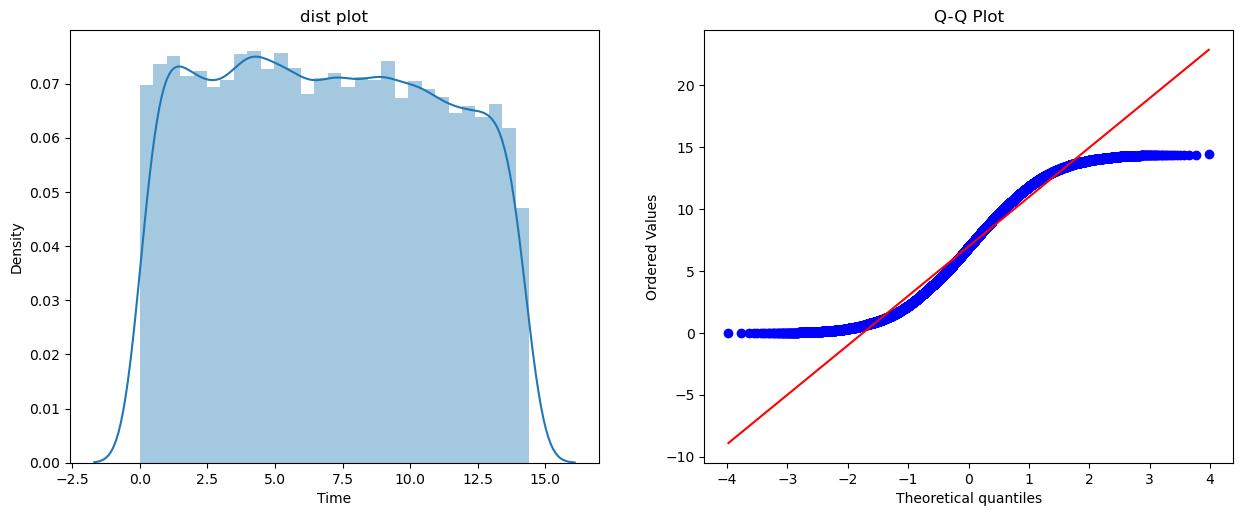

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


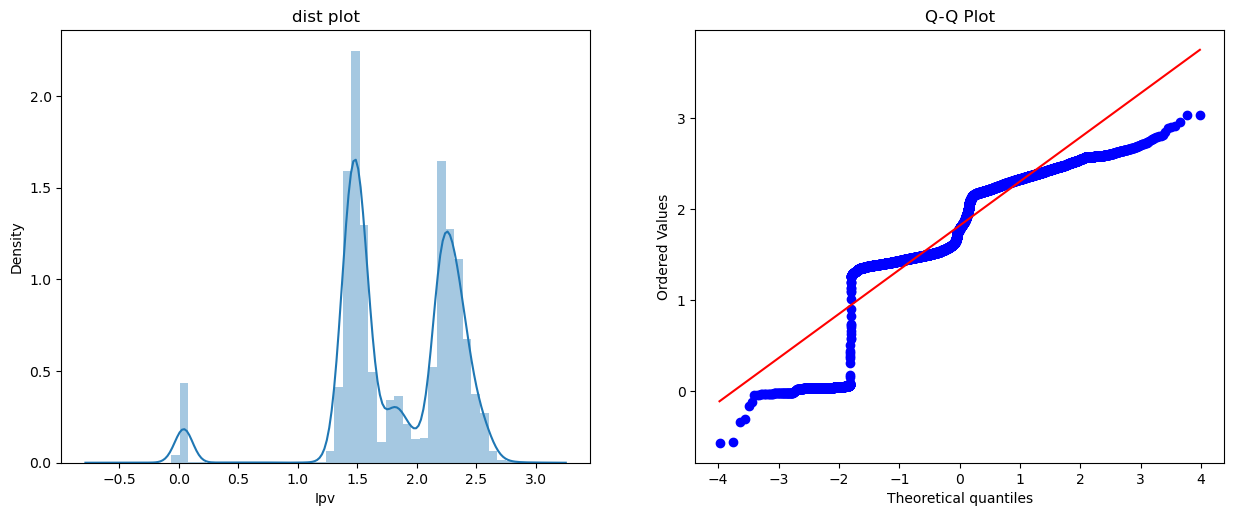

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


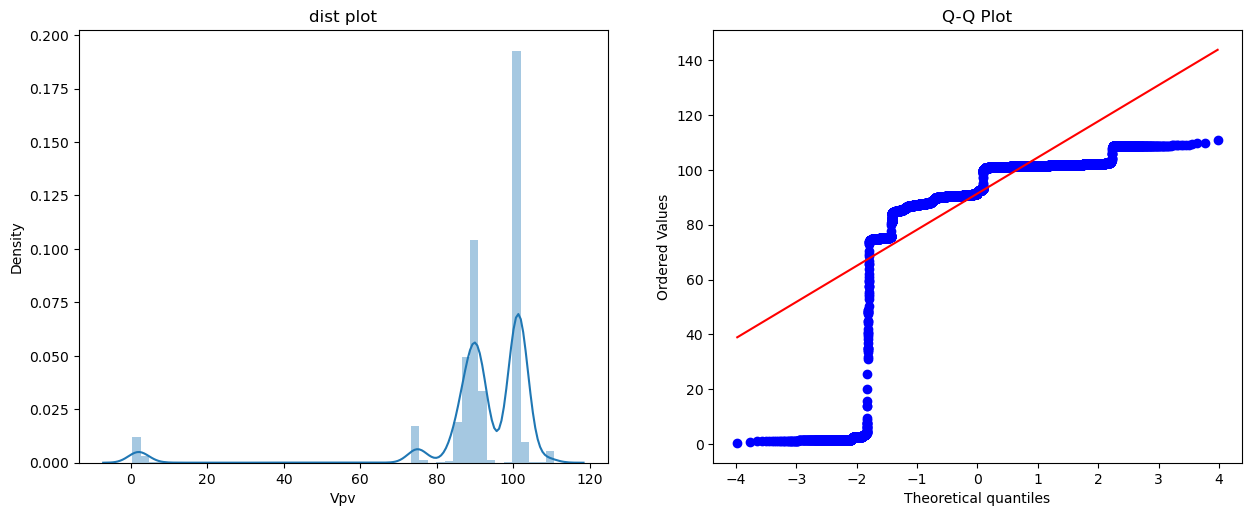

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


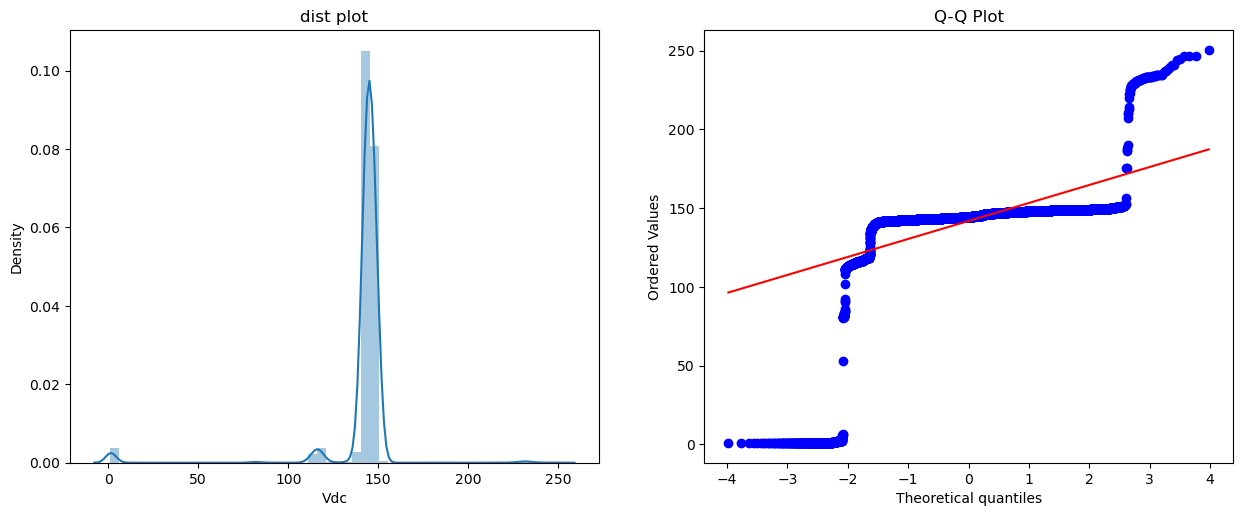

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


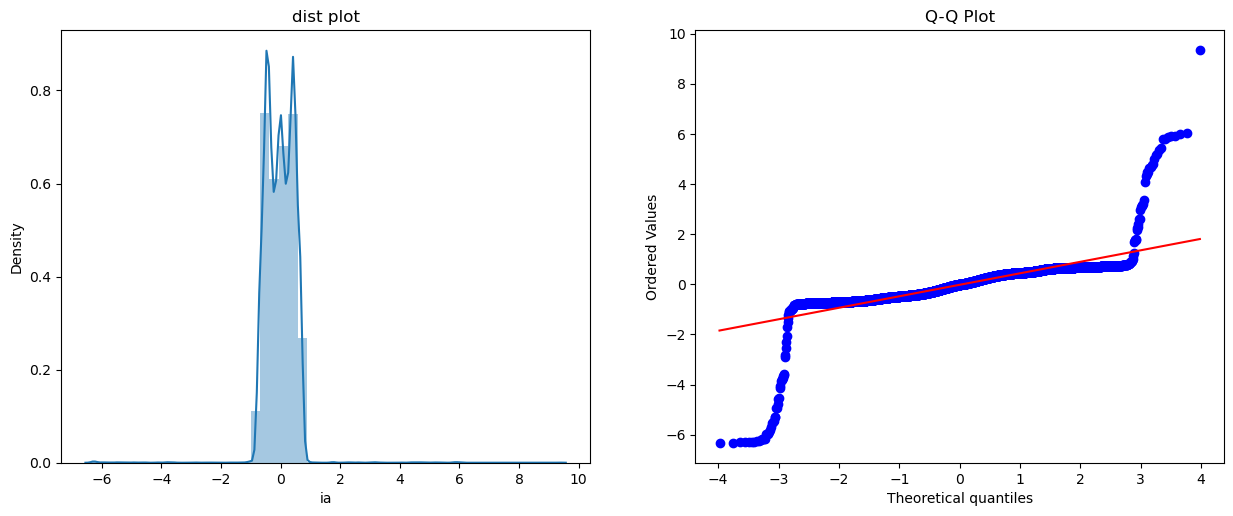

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


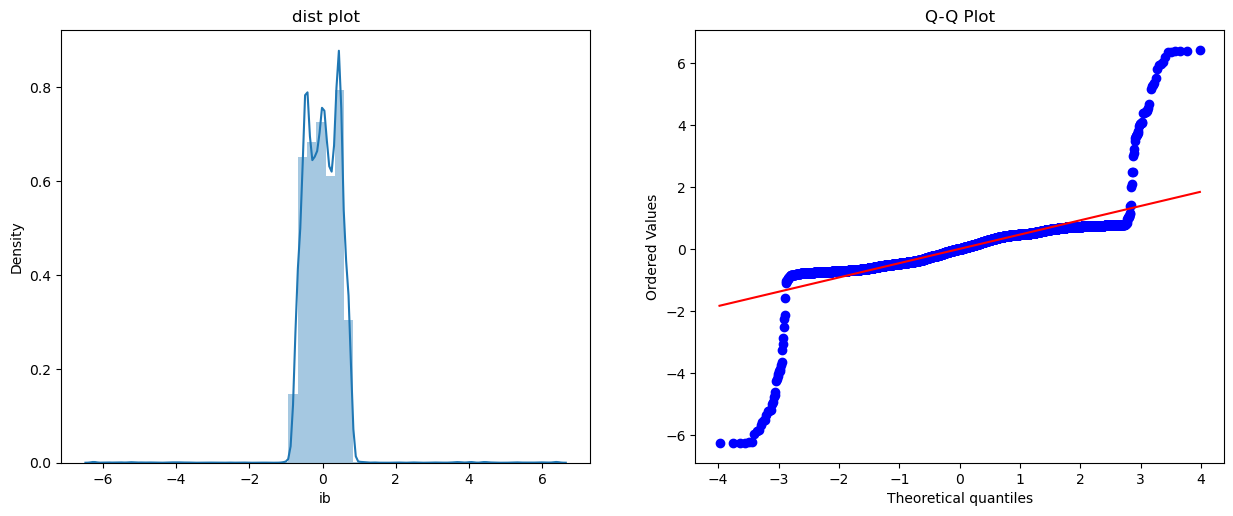

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


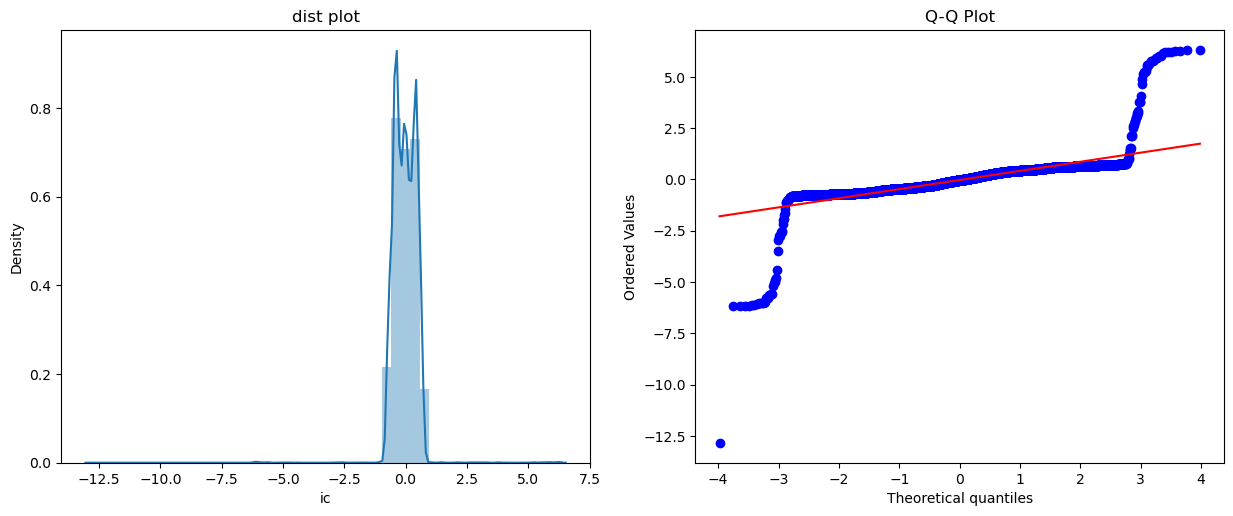

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


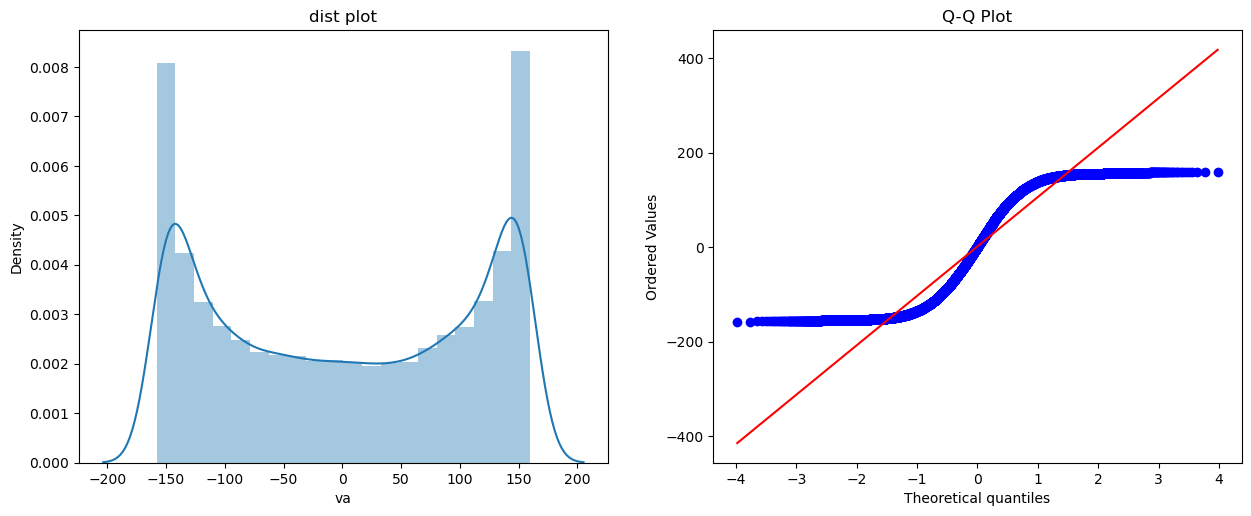

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


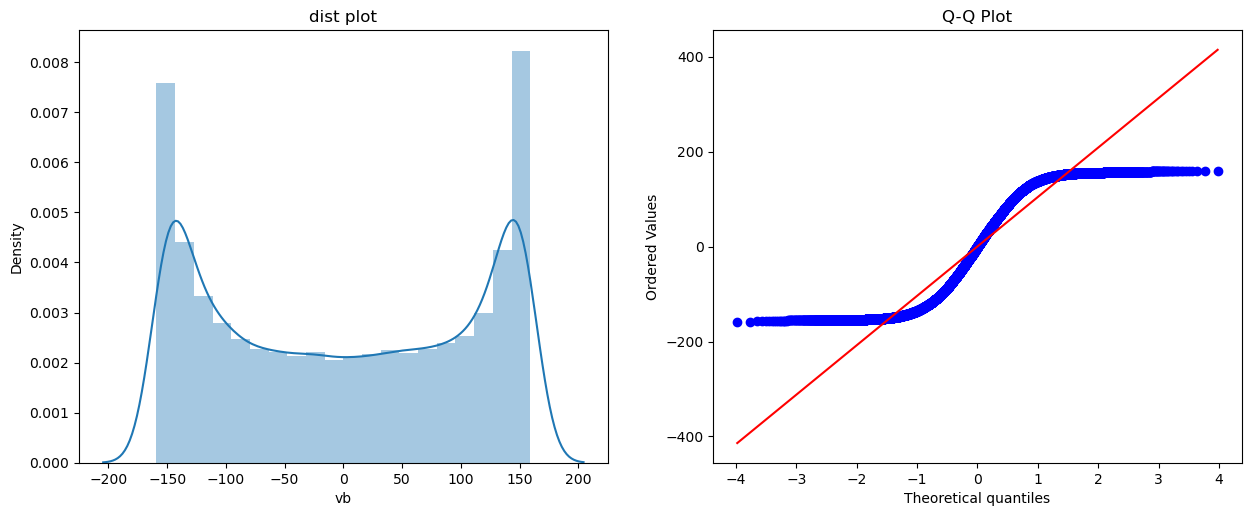

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


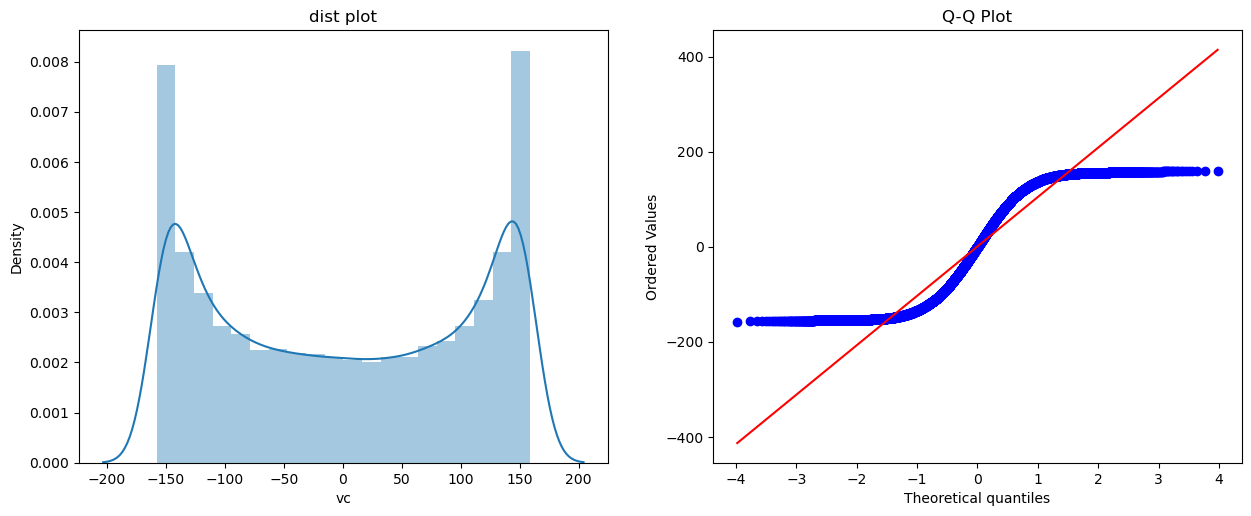

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


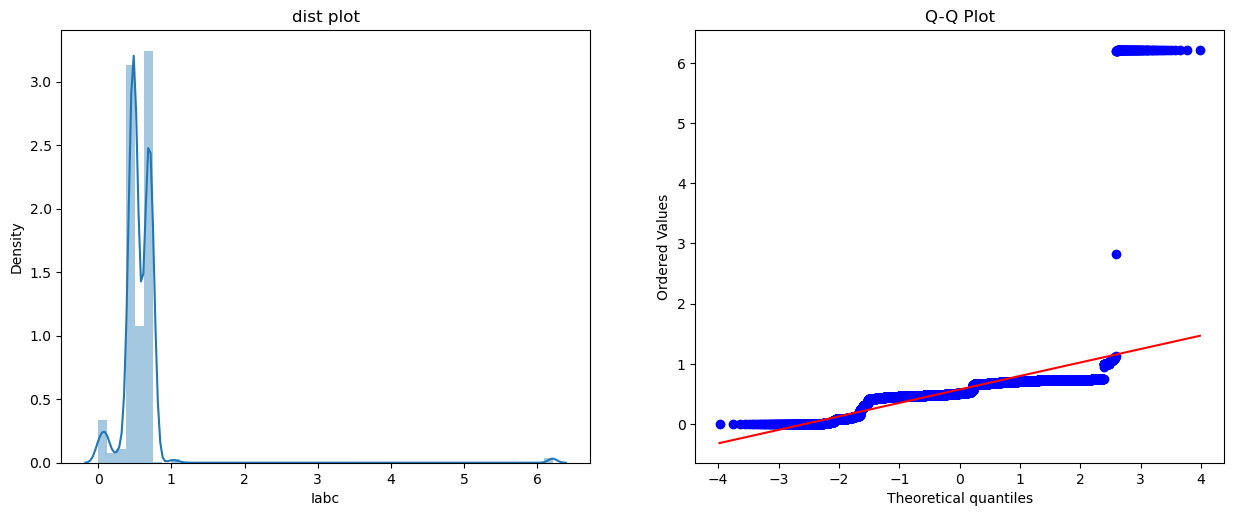

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


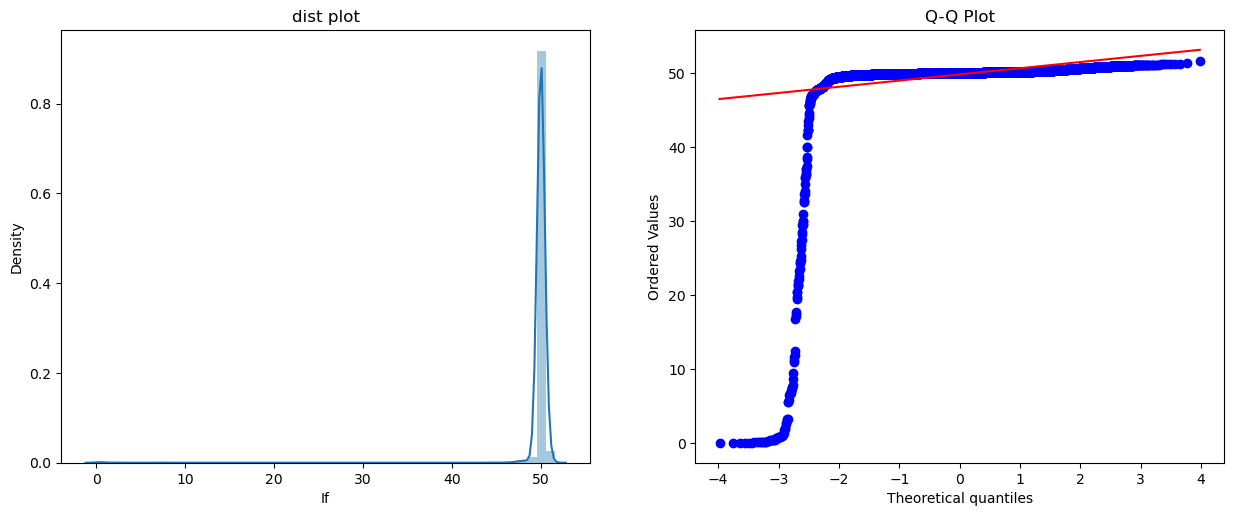

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


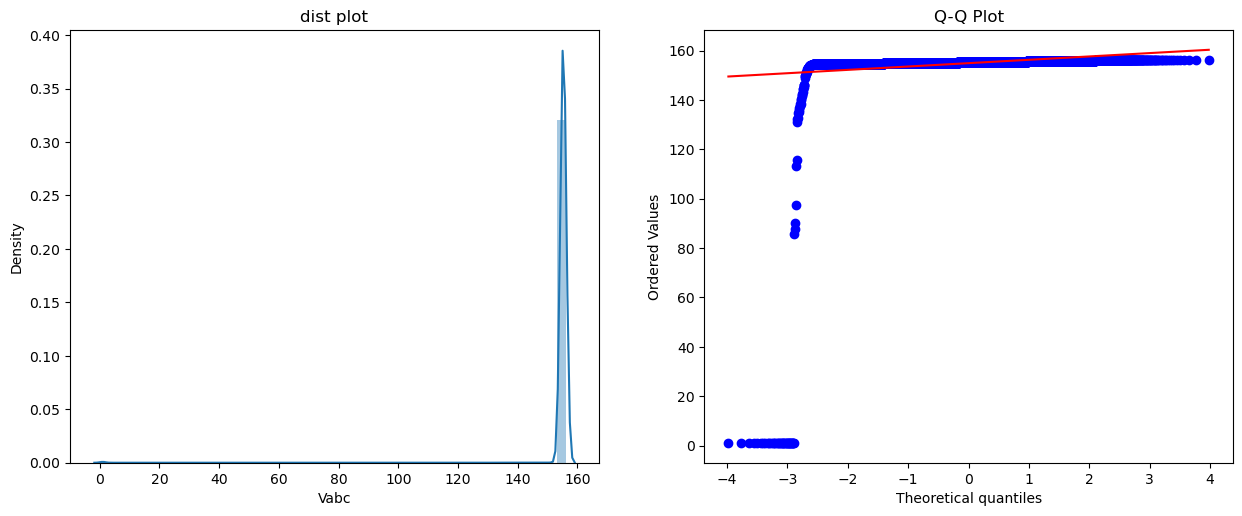

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


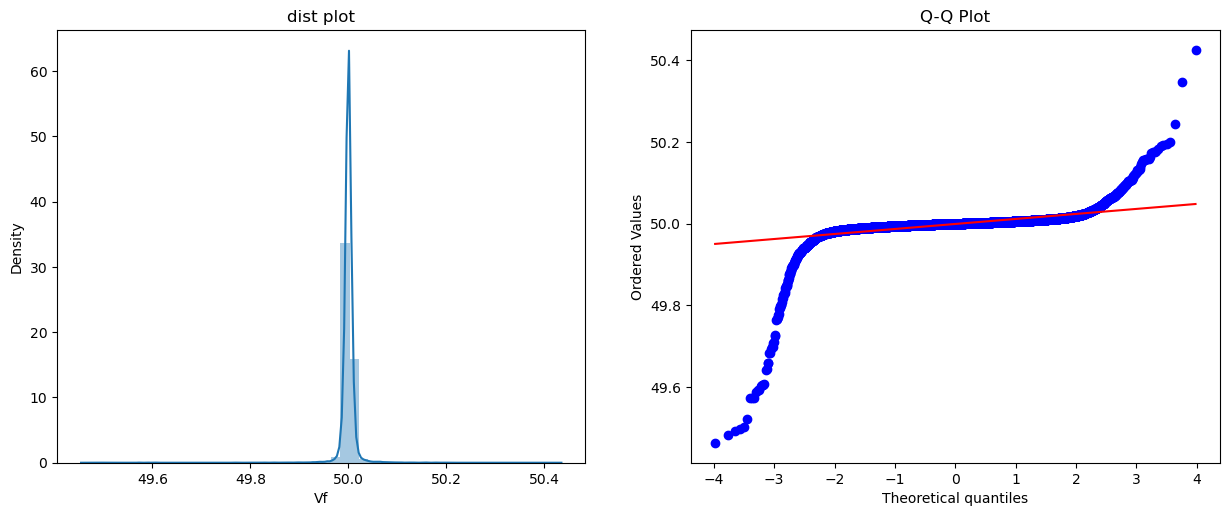

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


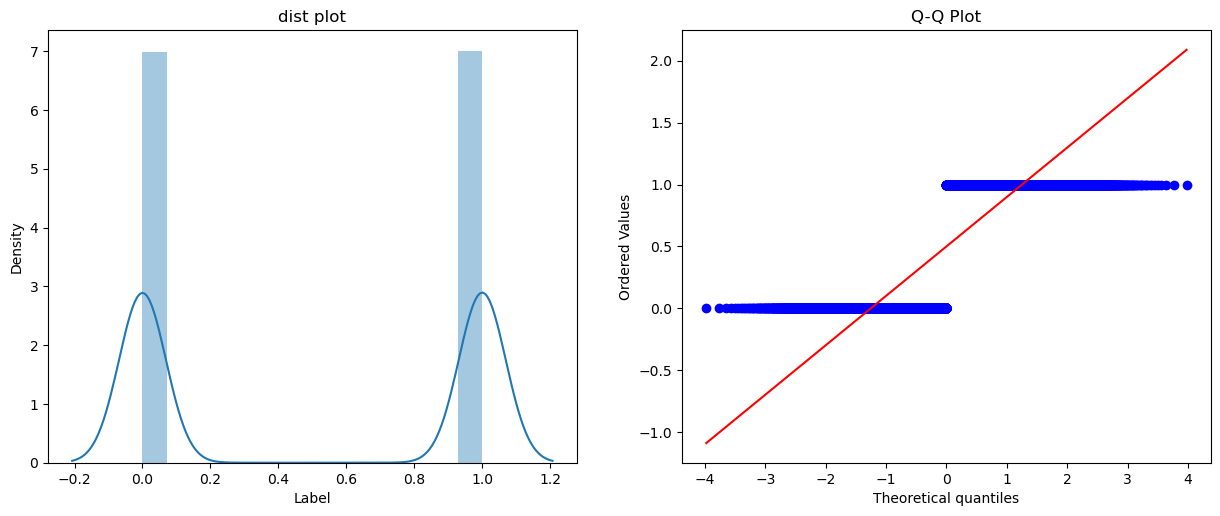

In [15]:
#checking the data distrubution using distwnce plot and Q - Q plot :
for col in data.columns:
    plt.figure(figsize=(15,100))
    plt.subplot(15, 2, 1)
    sns.distplot(data[col])
    plt.title("dist plot")
    plt.subplot(15, 2, 2)
    stats.probplot(data[col], dist="norm", plot=plt )
    plt.title("Q-Q Plot")
    plt.show()

In [21]:
data.corr()

,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,Label
Ipv,1.000000,0.002175,0.151260,-0.000705,-0.012911,0.003934,-0.000911,0.004095,-0.005180,0.379936,0.138196,-0.006793,-0.023456,-0.115003
Vpv,0.002175,1.000000,0.688443,0.017808,-0.001179,-0.021955,-0.006173,0.015283,-0.010796,-0.197944,0.174138,-0.010552,0.002485,-0.247696
Vdc,0.151260,0.688443,1.000000,0.032896,-0.012382,-0.022552,-0.000011,0.012008,-0.012795,-0.268743,0.103659,-0.008159,-0.005559,-0.153283
ia,-0.000705,0.017808,0.032896,1.000000,-0.488352,-0.491629,-0.753644,0.428756,0.329763,-0.075918,-0.002991,0.003119,0.005240,-0.022880
ib,-0.012911,-0.001179,-0.012382,-0.488352,1.000000,-0.494390,0.354584,-0.738629,0.388459,0.025991,-0.000188,-0.009692,-0.011460,0.007479
ic,0.003934,-0.021955,-0.022552,-0.491629,-0.494390,1.000000,0.385521,0.313963,-0.709000,0.059051,0.000229,0.004748,0.007187,0.018530
va,-0.000911,-0.006173,-0.000011,-0.753644,0.354584,0.385521,1.000000,-0.512953,-0.494240,-0.001253,-0.005687,-0.001632,-0.004056,0.005246
vb,0.004095,0.015283,0.012008,0.428756,-0.738629,0.313963,-0.512953,1.000000,-0.492387,-0.003720,0.000115,0.009175,0.011220,-0.004825
vc,-0.005180,-0.010796,-0.012795,0.329763,0.388459,-0.709000,-0.494240,-0.492387,1.000000,0.005347,0.005620,-0.006516,-0.006939,0.002317
Iabc,0.379936,-0.197944,-0.268743,-0.075918,0.025991,0.059051,-0.001253,-0.003720,0.005347,1.000000,0.103397,-0.041169,-0.001055,-0.038565


<AxesSubplot:>

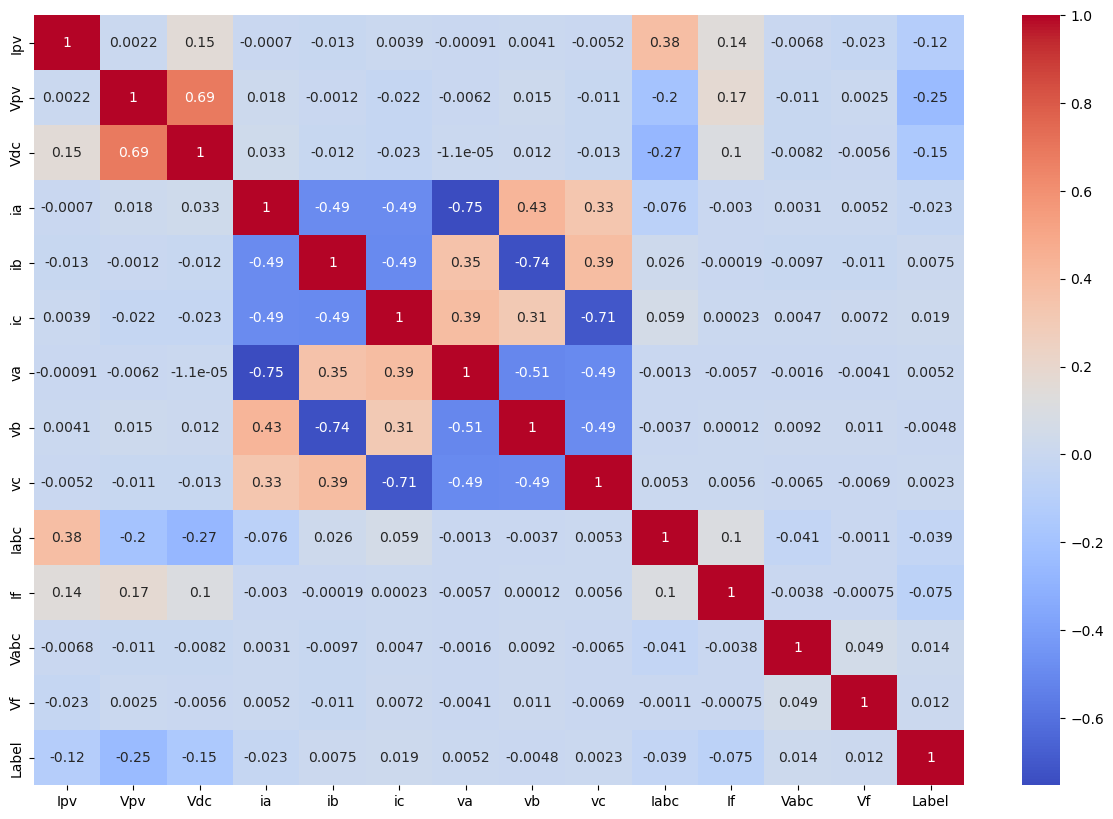

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True ,cmap='coolwarm')

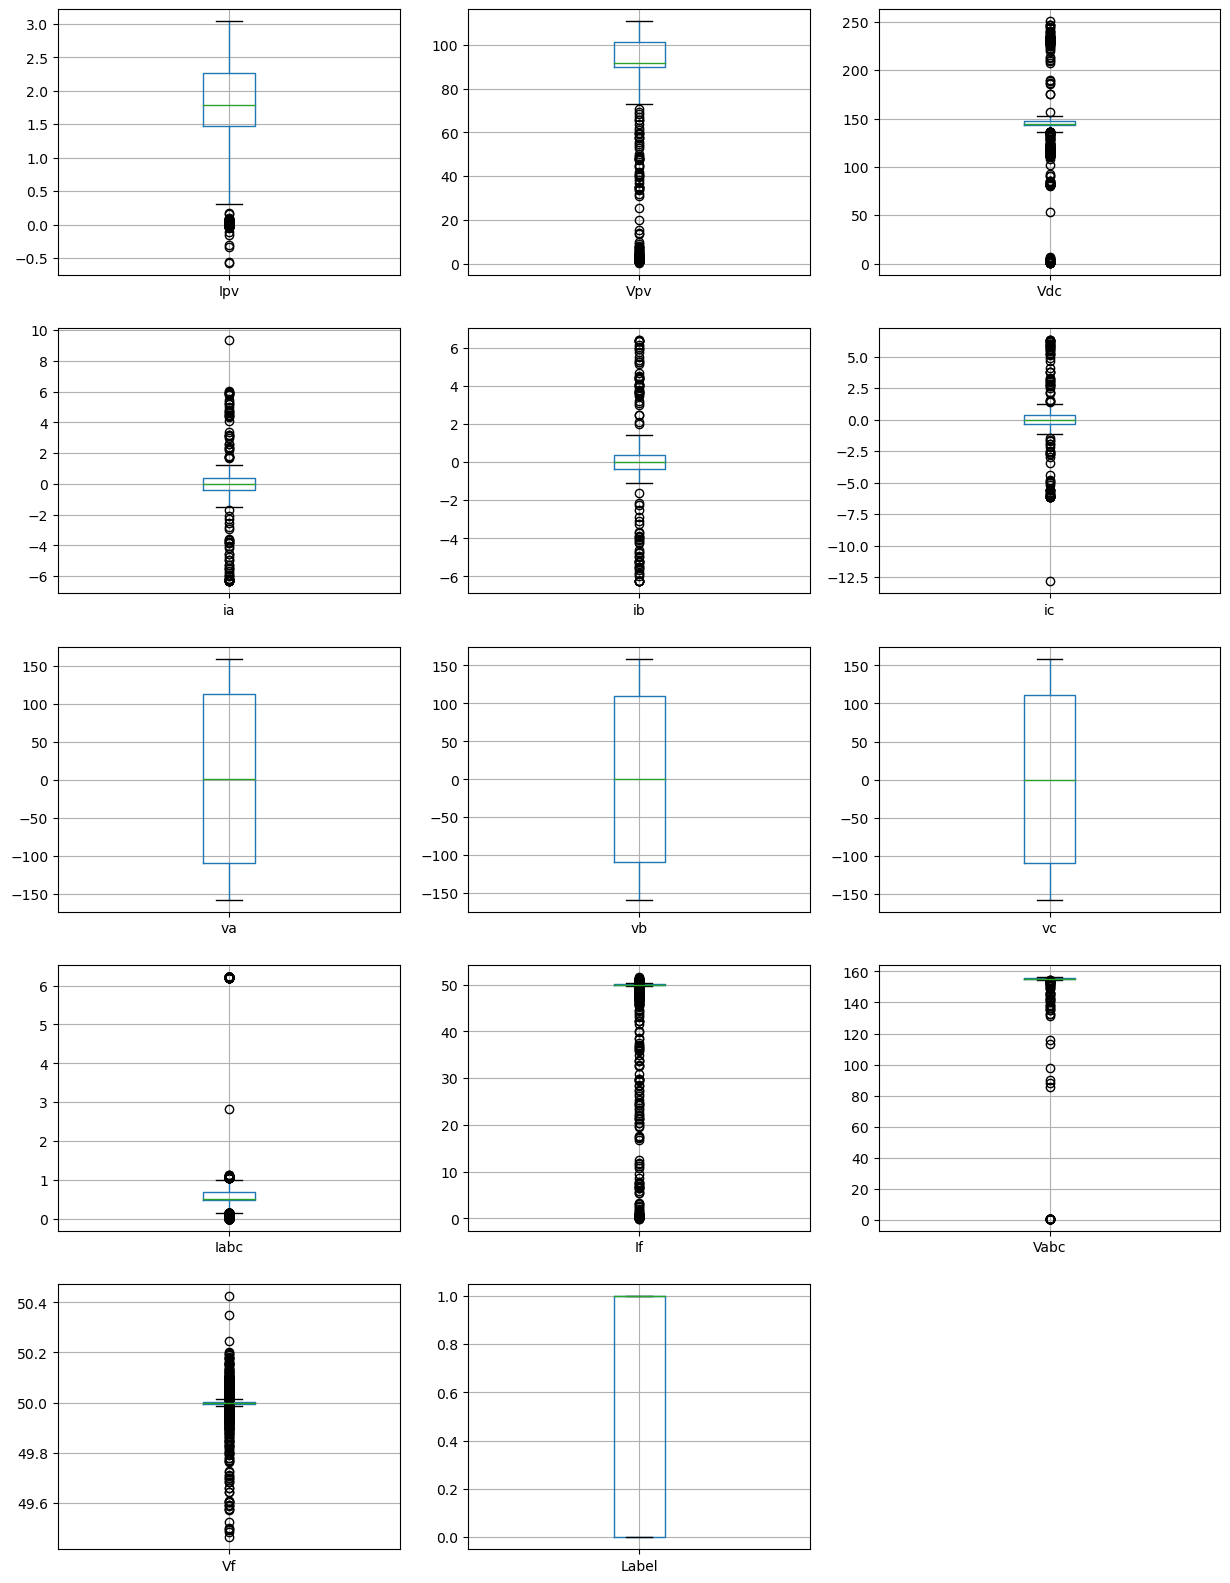

In [25]:
# finding Outliers :
# ploting boxplot
plt.figure(figsize=(15,20))
i = 1
for col in data.columns:
    plt.subplot(5,3,i)
    data[[col]].boxplot()
    i+=1

In [31]:
# function to check outlier percentage
def check_outlier_percent(col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    IQR = q3-q1
    upper_limit = q3 + 1.5*IQR
    lower_limit = q1 - 1.5*IQR
    percent_u = len(data[(data[col]>upper_limit)])/len(data*100)
    percent_l = len(data[(data[col]<lower_limit)])/len(data*100)
    return percent_u , percent_l

In [33]:
#creating dataframe of outliers record
out_df = pd.DataFrame()
for col in data.columns:
    column = col
    percent = check_outlier_percent(col)
    total_records = percent[0]*(len(data))+ percent[1]*(len(data))
    total_percent = (total_records /len(data)) *100
    out_df = out_df.append({"column name" :column ,"Upper":percent[0] ,"Lower":percent[1],"total_percent":total_percent ,"total_records":total_records } ,ignore_index=True)

C:\Users\YESHU\AppData\Local\Temp\ipykernel_14908\667762776.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df = out_df.append({"column name" :column ,"Upper":percent[0] ,"Lower":percent[1],"total_percent":total_percent ,"total_records":total_records } ,ignore_index=True)
C:\Users\YESHU\AppData\Local\Temp\ipykernel_14908\667762776.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df = out_df.append({"column name" :column ,"Upper":percent[0] ,"Lower":percent[1],"total_percent":total_percent ,"total_records":total_records } ,ignore_index=True)
C:\Users\YESHU\AppData\Local\Temp\ipykernel_14908\667762776.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_df = out_df.append({"column name" :column ,"Upper":perc

In [34]:
# dataframe
out_df

,column name,Upper,Lower,total_percent,total_records
0,Ipv,0.000000,0.034948,3.494825,699.0
1,Vpv,0.000000,0.036548,3.654817,731.0
2,Vdc,0.004550,0.053297,5.784711,1157.0
3,ia,0.001950,0.002150,0.409980,82.0
4,ib,0.002250,0.001950,0.419979,84.0
5,ic,0.002450,0.001950,0.439978,88.0
6,va,0.000000,0.000000,0.000000,0.0
7,vb,0.000000,0.000000,0.000000,0.0
8,vc,0.000000,0.000000,0.000000,0.0
9,Iabc,0.006600,0.046198,5.279736,1056.0


In [36]:
q1 = data["Vf"].quantile(0.25)
q3 = data["Vf"].quantile(0.75)
IQR = q3 - q1
upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR

In [38]:
len(data.loc[(data["Vf"] > upper_limit) & (data["Label"]  == 0)])

237

In [39]:
len(data.loc[(data["Vf"] < lower_limit) &  (data["Label"]  == 0)])

270

In [42]:
len(data.loc[(data["Vf"] < lower_limit) &  (data["Label"]  == 1)])

441

In [44]:
q1 = data["If"].quantile(0.25)
q3 = data["If"].quantile(0.75)
IQR = q3 - q1
upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR

In [46]:
# seprating output and input variable
x = data.drop("Label" ,axis =1)
# Label > output variable
y = data.Label

In [47]:
from sklearn.preprocessing import RobustScaler

In [ ]:
IQR robust scaler tranform

In [50]:
import pickle

In [48]:
# perform a robust scaler transform of the dataset
trans = RobustScaler()
data = trans.fit_transform(x)
# convert the array back to a dataframe
x = pd.DataFrame(data ,columns= x.columns)

In [51]:
with open("scaler.pickle","wb") as f:
    pickle.dump(trans,f)

In [ ]:
model building

In [ ]:
cross validation
grid search cv
randomized search CV

In [55]:
# spliting dataset train test 
x_train,x_test,y_train,y_test =train_test_split(x ,y,random_state = 42)

In [56]:
# LogisticRegression model treaning
lg_model = LogisticRegression()
lg_model.fit(x_train,y_train)
y_pred_te = lg_model.predict(x_test)

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
print("classification_report")
print(classification_report(y_test,y_pred_te))
print("Precision :",precision_score(y_test,y_pred_te))
print("Recall :",recall_score(y_test,y_pred_te))
print("F1 :",f1_score(y_test ,y_pred_te))

classification_report
              precision    recall  f1-score   support

           0       0.68      0.85      0.75      2460
           1       0.81      0.61      0.69      2541

    accuracy                           0.73      5001
   macro avg       0.74      0.73      0.72      5001
weighted avg       0.74      0.73      0.72      5001

Precision : 0.8095739084692267
Recall : 0.6056670602125147
F1 : 0.6929311121116614


In [ ]:
evaluating model on train data

In [58]:
y_pred_tr = lg_model.predict(x_train)

In [59]:
print("classification_report")
print(classification_report(y_train,y_pred_tr))
print("Precision :",precision_score(y_train,y_pred_tr))
print("Recall :",recall_score(y_train,y_pred_tr))
print("F1 :",f1_score(y_train,y_pred_tr))

classification_report
              precision    recall  f1-score   support

           0       0.69      0.86      0.77      7531
           1       0.81      0.61      0.70      7469

    accuracy                           0.73     15000
   macro avg       0.75      0.73      0.73     15000
weighted avg       0.75      0.73      0.73     15000

Precision : 0.8122988916696461
Recall : 0.6083813094122372
F1 : 0.6957054275434433


In [60]:
# ploting ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

In [61]:
# Prediction Of probablity
y_proba = lg_model.predict_proba(x_test)
fpr ,tpr ,threshold = roc_curve(y_test,y_proba[:,1])

In [62]:
# importing plot_roc_curve :
from sklearn.metrics import plot_roc_curve

E:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


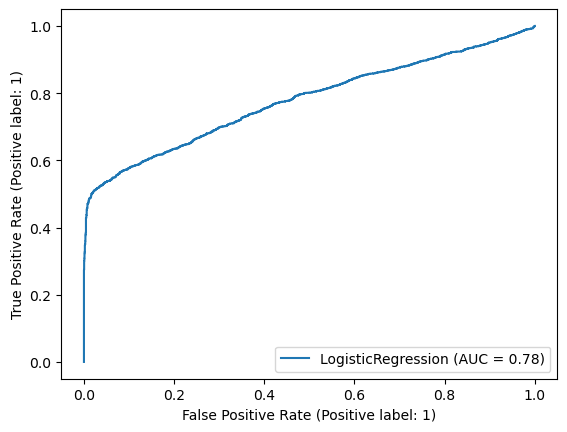

In [63]:
plot_roc_curve(lg_model,x_test,y_test)

In [85]:
# Visual representation of Confusion metrics
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_te)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                            display_labels = [False, True])
cm_display.plot('Reds')
plt.show()

TypeError: plot() takes 1 positional argument but 2 were given

In [65]:
# importing  RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [66]:
# Training RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100 ,max_depth = 10 ,
                                  max_features= 10 ,max_leaf_nodes= 8 ,n_jobs= 4)
rf_model.fit(x_train,y_train)
y_pred_te = rf_model.predict(x_test)

In [67]:
print("classification_report")
print(classification_report(y_test,y_pred_te))
print("Precision :",precision_score(y_test,y_pred_te))
print("Recall :",recall_score(y_test,y_pred_te))
print("F1 :",f1_score(y_test ,y_pred_te))

classification_report
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      2460
           1       0.97      0.82      0.89      2541

    accuracy                           0.90      5001
   macro avg       0.91      0.90      0.90      5001
weighted avg       0.91      0.90      0.90      5001

Precision : 0.9717068645640075
Recall : 0.824478551751279
F1 : 0.8920587609112199


In [69]:
y_pred_tr = rf_model.predict(x_train)

In [70]:
print("classification_report")
print(classification_report(y_train,y_pred_tr))
print("Precision :",precision_score(y_train,y_pred_tr))
print("Recall :",recall_score(y_train,y_pred_tr))
print("F1 :",f1_score(y_train,y_pred_tr))

classification_report
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      7531
           1       0.97      0.83      0.90      7469

    accuracy                           0.91     15000
   macro avg       0.91      0.91      0.91     15000
weighted avg       0.91      0.91      0.91     15000

Precision : 0.9736019993751952
Recall : 0.8345159994644531
F1 : 0.8987095378847956


In [72]:
import numpy as np

In [73]:
# Parameter Grid :
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 90, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [74]:
import time
from sklearn.model_selection import RandomizedSearchCV

In [75]:
start_time = time.time()
# Cross Validation
rf_model = RandomForestClassifier()
gscv_rf_model = RandomizedSearchCV(rf_model ,param_grid,cv=5,n_jobs=-1)
gscv_rf_model.fit(x_train,y_train)

end_time = time.time()
total_time = end_time - start_time 
print(total_time/60)

E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


3.7420516570409137


In [76]:
# Best estimator
gscv_rf_model.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=34, max_features='auto',
                       min_samples_split=5, n_estimators=466)

In [77]:
rf_model = RandomForestClassifier(bootstrap= False ,max_depth=82 ,min_samples_leaf=7 ,min_samples_split=10,
                                 n_estimators =200,max_features='sqrt' )
rf_model.fit(x_train,y_train)
y_pred_te = rf_model.predict(x_test)

In [79]:
print("classification_report")
print(classification_report(y_test,y_pred_te))
print("Precision :",precision_score(y_test,y_pred_te))
print("Recall :",recall_score(y_test,y_pred_te))
print("F1 :",f1_score(y_test ,y_pred_te))

classification_report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2460
           1       0.98      0.94      0.96      2541

    accuracy                           0.96      5001
   macro avg       0.96      0.96      0.96      5001
weighted avg       0.96      0.96      0.96      5001

Precision : 0.9790554414784394
Recall : 0.9382133018496654
F1 : 0.9581993569131833


In [80]:
#Model evaluation on Train data

y_pred_tr = rf_model.predict(x_train)

In [81]:
print("classification_report")
print(classification_report(y_train,y_pred_tr))
print("Precision :",precision_score(y_train,y_pred_tr))
print("Recall :",recall_score(y_train,y_pred_tr))
print("F1 :",f1_score(y_train,y_pred_tr))

classification_report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7531
           1       0.99      0.98      0.99      7469

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000

Precision : 0.9944278336504485
Recall : 0.9796492167626188
F1 : 0.9869832063128078


E:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


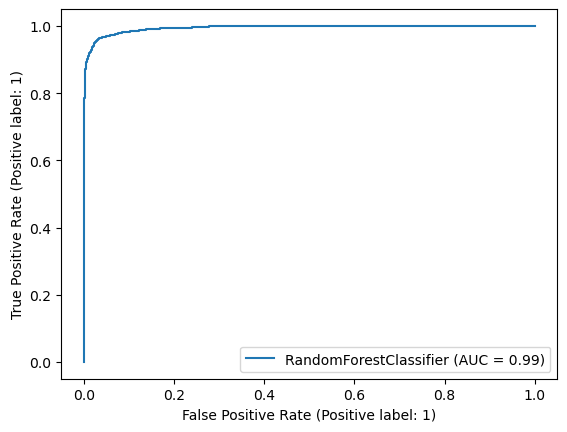

In [82]:
# Ploting ROC curve :
plot_roc_curve(rf_model,x_test,y_test)

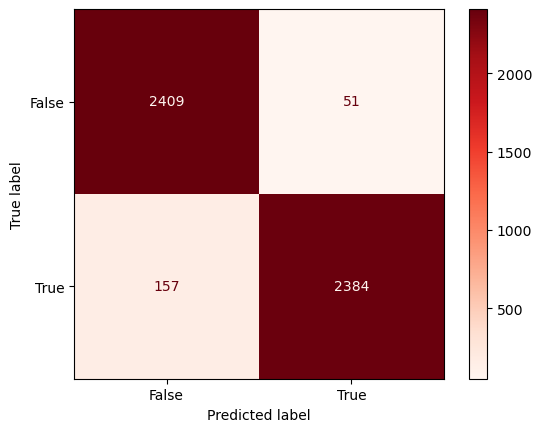

In [84]:
# Visulizing Confuson Metricies
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_te)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                            display_labels = [False, True])
cm_display.plot(cmap='Reds')
plt.show()


In [86]:
Ipv = 2.6243286
Vpv = 87.06055
Vdc = 147.36328
ia = -0.061280273
ib = 0.5975342
ic = -0.56311524
va = -12.150879
vb = -125.86044
vc = 142.3027
Iabc = 0.68265504
If = 50.06943
Vabc = 155.76646
Vf = 50.01901



input_array = np.array([Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf])

In [87]:
df1 = pd.DataFrame(input_array ,index = x.columns)

In [88]:
df1 = df1.transpose()

In [89]:
prediction_out = rf_model.predict(df1)

In [91]:
prediction_out

array([1], dtype=int64)

In [92]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'E:\solor\RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(rf_model, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()